In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df_encoded = pd.read_csv('Data_Preproc_Encoded.csv')
df_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.619462,6,2,6,0,2,0,10,3.076705,0.492293,11,1,2,0,3
1,1.873982,6,2,6,0,2,0,10,3.385311,0.601900,11,1,2,0,2
2,1.393432,6,2,6,0,2,0,10,3.328931,0.557061,11,1,2,0,3
3,1.412426,2,3,1,0,2,0,10,2.726555,0.381690,11,1,5,0,3
4,1.501699,6,3,6,0,2,0,10,2.952075,0.503254,11,1,5,0,3


In [3]:
df_no_encoded = pd.read_csv('Data_Preproc_NoEncoding.csv')
df_no_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [4]:
numeric_cols = df_no_encoded.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')


In [5]:
discrete_cols = list(set(df_no_encoded.columns) - set(numeric_cols))
discrete_cols

['gill-attachment',
 'habitat',
 'season',
 'does-bruise-or-bleed',
 'has-ring',
 'cap-shape',
 'gill-spacing',
 'stem-color',
 'cap-surface',
 'gill-color',
 'cap-color',
 'ring-type']

In [6]:
skewness = df_encoded.skew()
print("Skewness:\n", skewness)

# Compute kurtosis
kurtosis = df_encoded.kurtosis()
print("\nKurtosis:\n", kurtosis)

Skewness:
 cap-diameter            3.822844
cap-shape              -0.563139
cap-surface            -0.342081
cap-color               0.121107
does-bruise-or-bleed    1.725283
gill-attachment         0.421470
gill-spacing            1.948995
gill-color             -0.464609
stem-height             2.020904
stem-width              2.164957
stem-color             -0.608742
has-ring                1.163654
ring-type               2.445265
habitat                 2.335932
season                  0.282778
dtype: float64

Kurtosis:
 cap-diameter            27.077467
cap-shape               -1.188731
cap-surface             -1.194974
cap-color               -0.952076
does-bruise-or-bleed     0.976635
gill-attachment         -1.276891
gill-spacing             2.597535
gill-color              -1.084353
stem-height              7.682672
stem-width               8.768399
stem-color              -0.788827
has-ring                -0.645930
ring-type                4.696068
habitat                  

In [7]:
from scipy.stats import skew, kurtosis

for i in numeric_cols:
    # Compute skewness
    skewness_ = skew(df_encoded[i])
    print(f"Skewness of {i}:", skewness_)

    # Compute kurtosis
    kurtosis_ = kurtosis(df_encoded[i], fisher=True)  # fisher=True ensures it's consistent with Pandas' kurtosis.
    #kurtosis_B = kurtosis(df_encoded['B'], fisher=True)
    print(f"Kurtosis of {i}:", kurtosis_)
    print("\n")

Skewness of cap-diameter: 3.822750077721743
Kurtosis of cap-diameter: 27.075151571012558


Skewness of stem-height: 2.020853996013405
Kurtosis of stem-height: 7.681944909266814


Skewness of stem-width: 2.164903536205732
Kurtosis of stem-width: 8.767582627647071




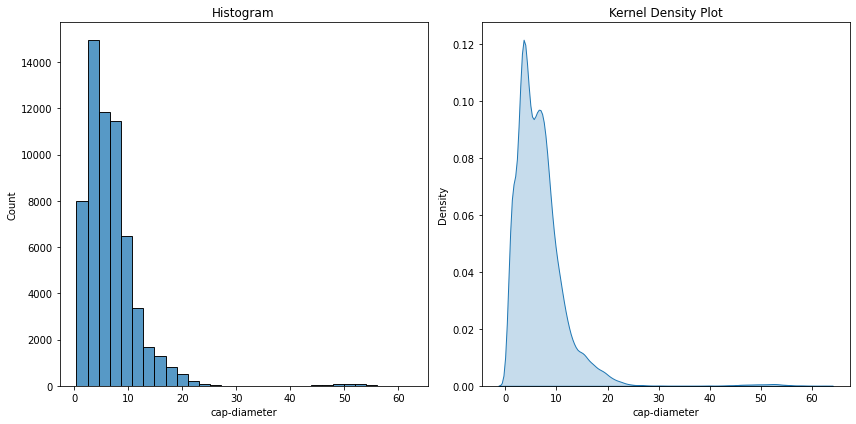

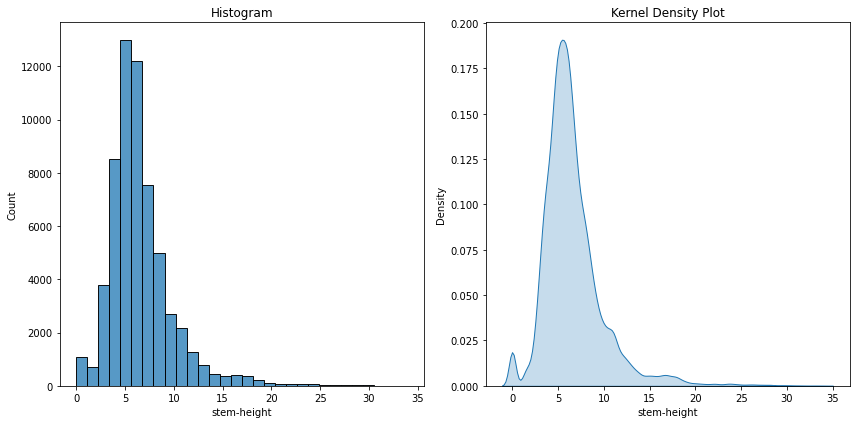

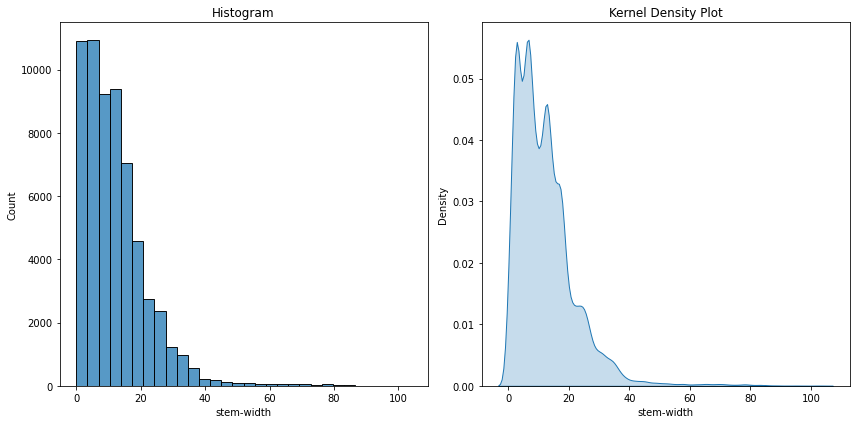

In [8]:
for i in numeric_cols:
    # Plotting histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_no_encoded[i], kde=False, bins=30)
    plt.title('Histogram')

    # Plotting kernel density plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_no_encoded[i], fill=True)
    plt.title('Kernel Density Plot')

    plt.tight_layout()
    plt.show()

This is how the histogram and kernel density plot will look like for a discrete data column

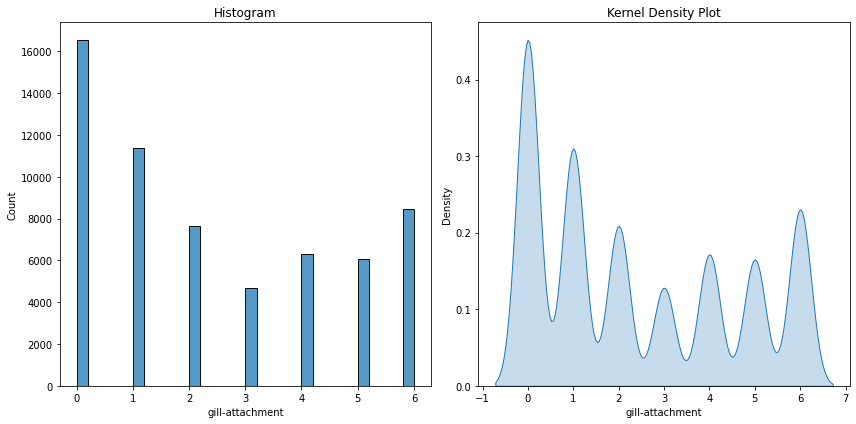

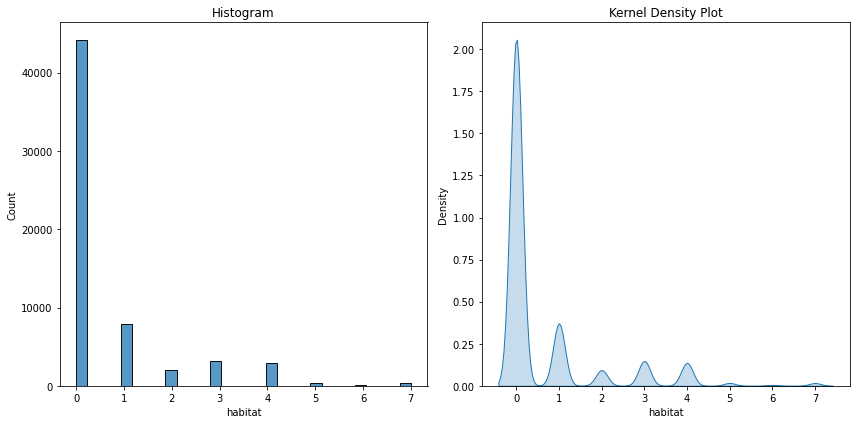

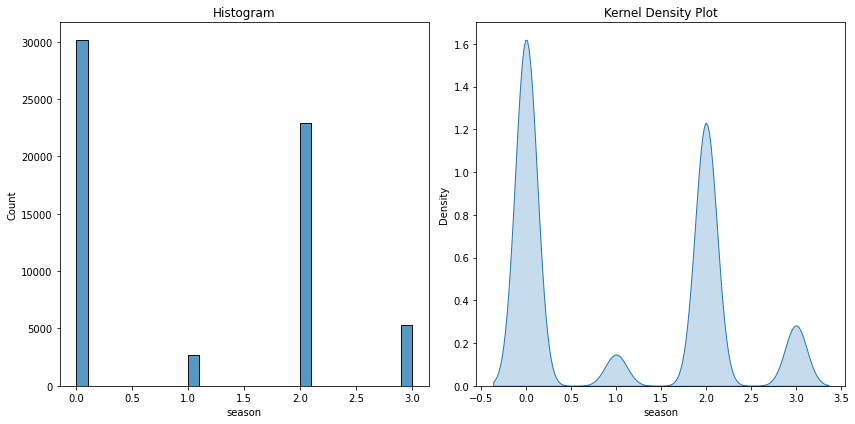

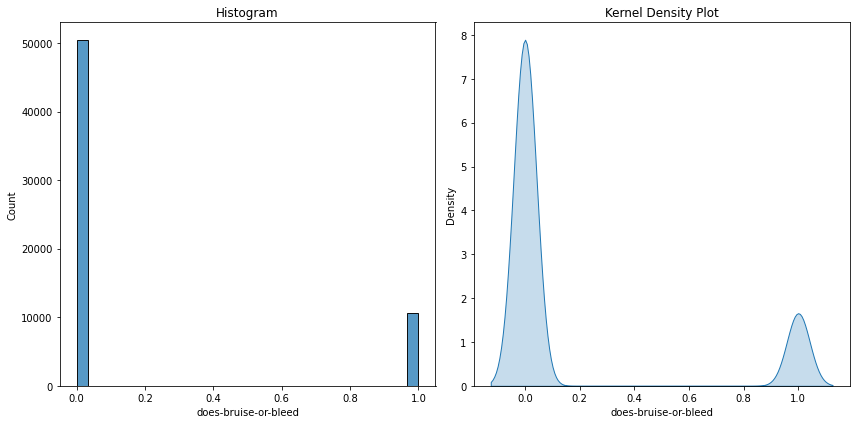

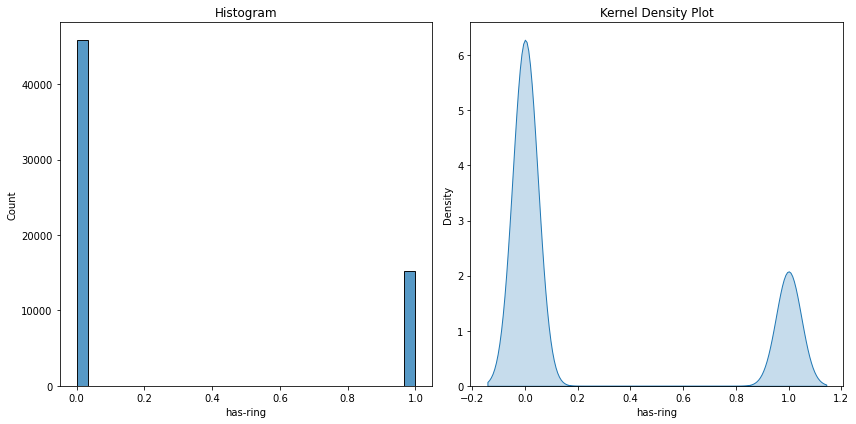

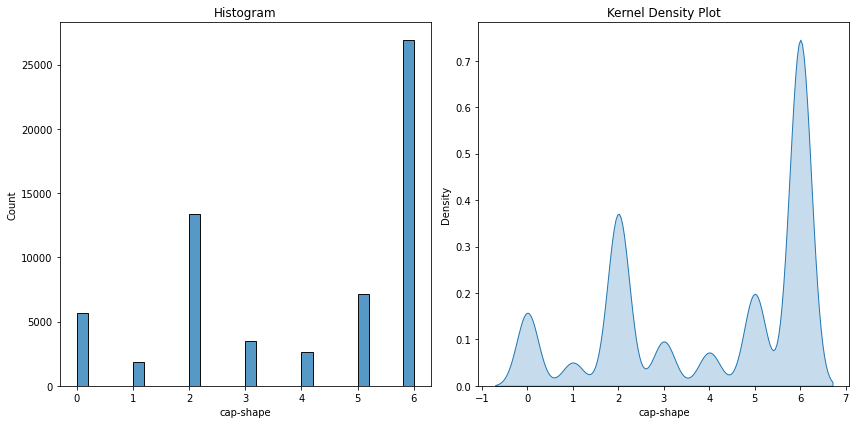

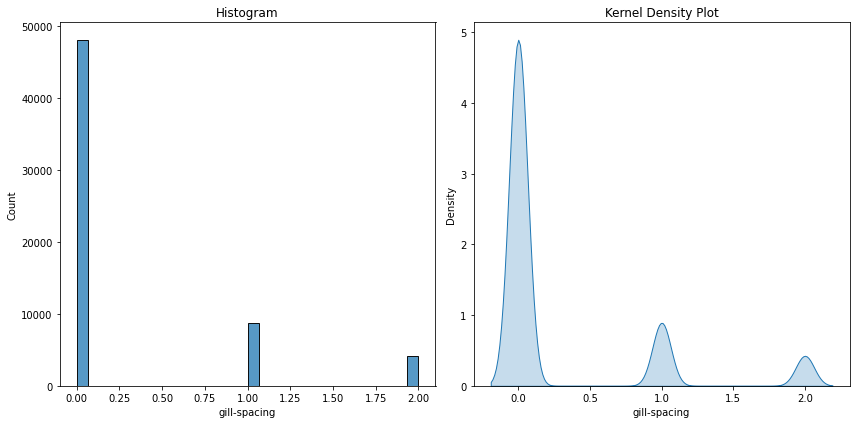

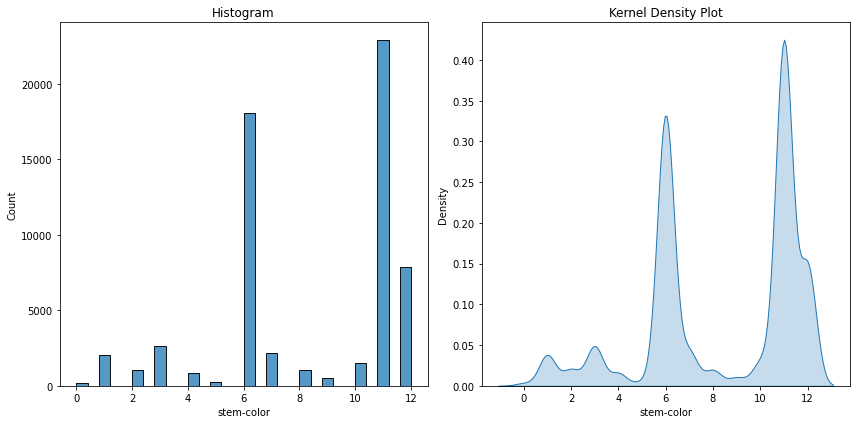

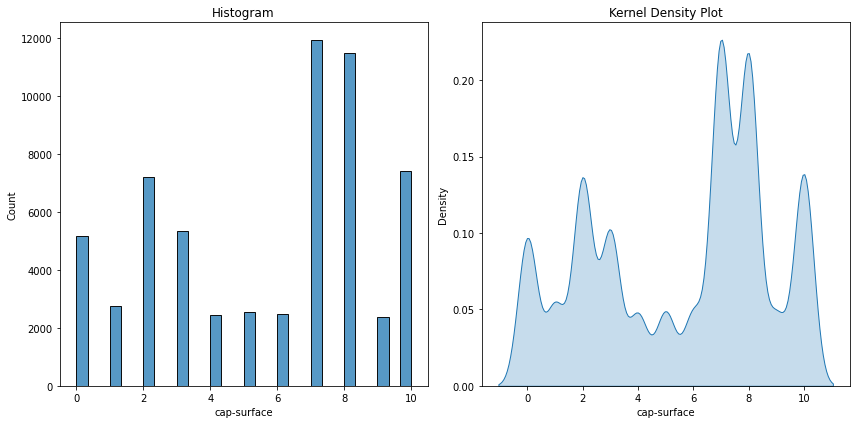

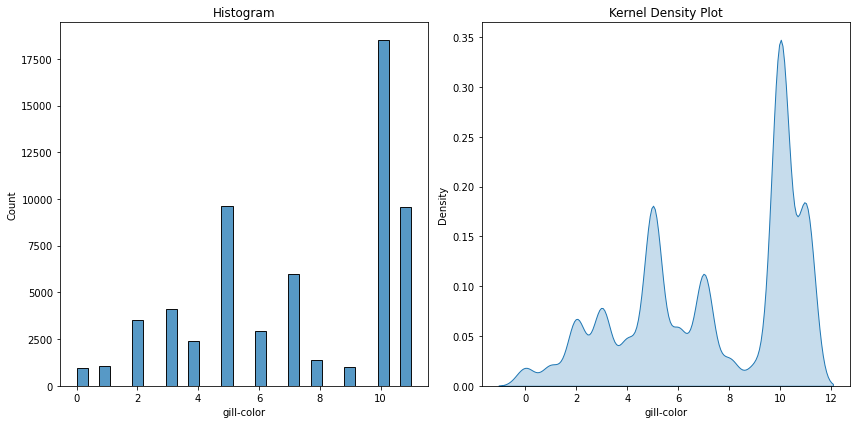

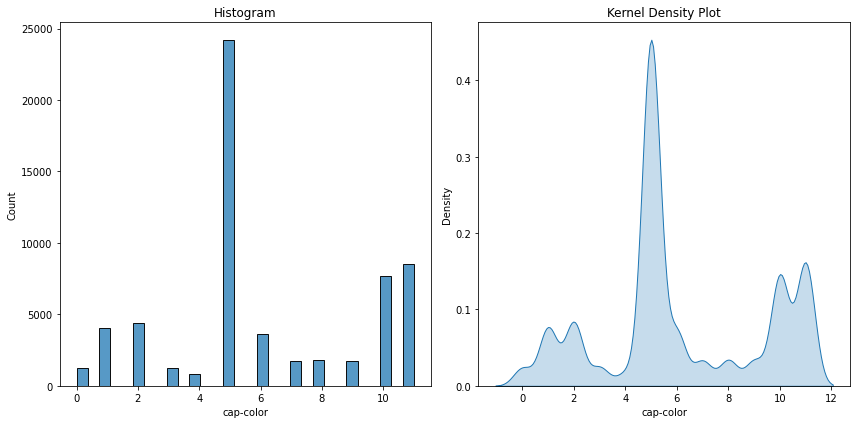

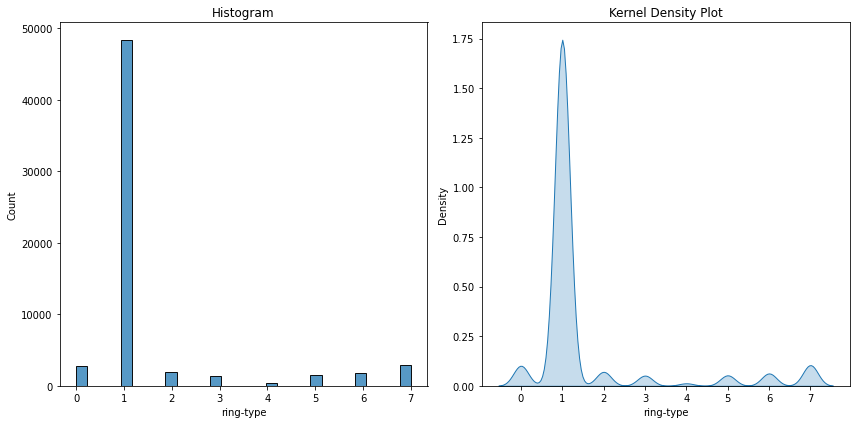

In [9]:
for i in discrete_cols:
    # Plotting histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_encoded[i], kde=False, bins=30)
    plt.title('Histogram')

    # Plotting kernel density plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_encoded[i], fill=True)
    plt.title('Kernel Density Plot')

    plt.tight_layout()
    plt.show()

If mode is availabe: 
$kp1 = \frac{mean - mode}{stddev}$ 
\
kp1 lies between -1 and 1

If mode is unavailabe:
$kp2 = 3* \frac{mean - median}{stddev}$ \
kp2 lies between -3 and 3

We can compute a unique mode

In [10]:
import pandas as pd

def compute_kp(series):
    mean_val = series.mean()
    median_val = series.median()
    stddev_val = series.std()

    # Check if a unique mode exists
    mode_val = series.mode()
    if len(mode_val) == 1:
        mode_val = mode_val.iloc[0]
        kp1 = (mean_val - mode_val) / stddev_val
        print(f"kp1: {kp1}")
    else:
        kp2 = 3 * (mean_val - median_val) / stddev_val
        print(f"kp2: {kp2}")

# Apply the function on each column of the DataFrame
kp_values = df_encoded.apply(compute_kp)

# Print the results
#print(kp_values)

kp1: 0.6750159839829443
kp1: -0.9157069614574703
kp1: -0.44510036247758067
kp1: 0.36093149325523416
kp1: 0.45802486230801004
kp1: 1.1092128987647962
kp1: 0.48192176140751447
kp1: -0.835261018473633
kp1: 1.952968940779226
kp1: 1.210588325618101
kp1: -0.798792933187371
kp1: 0.5751206955496224
kp1: 0.34892090402776466
kp1: 0.4927172688437128
kp1: 0.9570457967112416


In [11]:
import pandas as pd

def compute_kp2(series):
    mean_val = series.mean()
    median_val = series.median()
    stddev_val = series.std()

    # Check if a unique mode exists
    kp2 = 3 * (mean_val - median_val) / stddev_val
    print(f"kp2: {kp2}")

# Apply the function on each column of the DataFrame
kp_values = df_encoded.apply(compute_kp2)

kp2: 0.4979374518599067
kp2: -1.3443538348491133
kp2: -1.335301087432742
kp2: 1.0827944797657025
kp2: 1.37407458692403
kp2: 0.5603349420099308
kp2: 1.4457652842225435
kp2: 0.31869780245276946
kp2: 0.5621974185844008
kp2: 0.5857170552900951
kp2: -2.396378799562113
kp2: 1.725362086648867
kp2: 1.046762712083294
kp2: 1.4781518065311383
kp2: 0.14528872901071552


Comment on iterquartile range, min and max (range = max - min)

In [12]:
df_encoded.describe()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,6.106900e+04,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,6.106900e+04,6.106900e+04,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,6.701806e-17,4.041641,5.585207,6.144541,0.173410,2.404968,0.280322,7.338502,2.233935e-16,-1.265897e-16,8.429072,0.248555,1.573204,0.623721,1.053300
std,1.000008e+00,2.138630,3.178593,3.171077,0.378605,2.168175,0.581676,3.186426,1.000008e+00,1.000008e+00,3.218516,0.432179,1.642791,1.265880,1.100575
min,-1.206855e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.952985e+00,-1.210598e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.180393e-01,2.000000,3.000000,5.000000,0.000000,0.000000,0.000000,5.000000,-5.761259e-01,-6.914605e-01,6.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.659805e-01,5.000000,7.000000,5.000000,0.000000,2.000000,0.000000,7.000000,-1.874007e-01,-1.952406e-01,11.000000,0.000000,1.000000,0.000000,1.000000
75%,3.430605e-01,6.000000,8.000000,10.000000,0.000000,4.000000,0.000000,10.000000,3.437583e-01,4.404789e-01,11.000000,0.000000,1.000000,1.000000,2.000000
max,1.056187e+01,6.000000,10.000000,11.000000,1.000000,6.000000,2.000000,11.000000,8.112329e+00,9.143259e+00,12.000000,1.000000,7.000000,7.000000,3.000000


We may not need to comment on the iqr and range of the discrete

In [13]:
# Calculate IQR for each column
iqr = df_encoded.quantile(0.75) - df_encoded.quantile(0.25)

# Calculate range for each column
data_range = df_encoded.max() - df_encoded.min()

# Combine results into a DataFrame
result = pd.DataFrame({'IQR': iqr, 'Range': data_range})

# Print the results
print(result)

                           IQR      Range
cap-diameter          0.961100  11.768724
cap-shape             4.000000   6.000000
cap-surface           5.000000  10.000000
cap-color             5.000000  11.000000
does-bruise-or-bleed  0.000000   1.000000
gill-attachment       4.000000   6.000000
gill-spacing          0.000000   2.000000
gill-color            5.000000  11.000000
stem-height           0.919884  10.065314
stem-width            1.131939  10.353858
stem-color            5.000000  12.000000
has-ring              0.000000   1.000000
ring-type             0.000000   7.000000
habitat               1.000000   7.000000
season                2.000000   3.000000


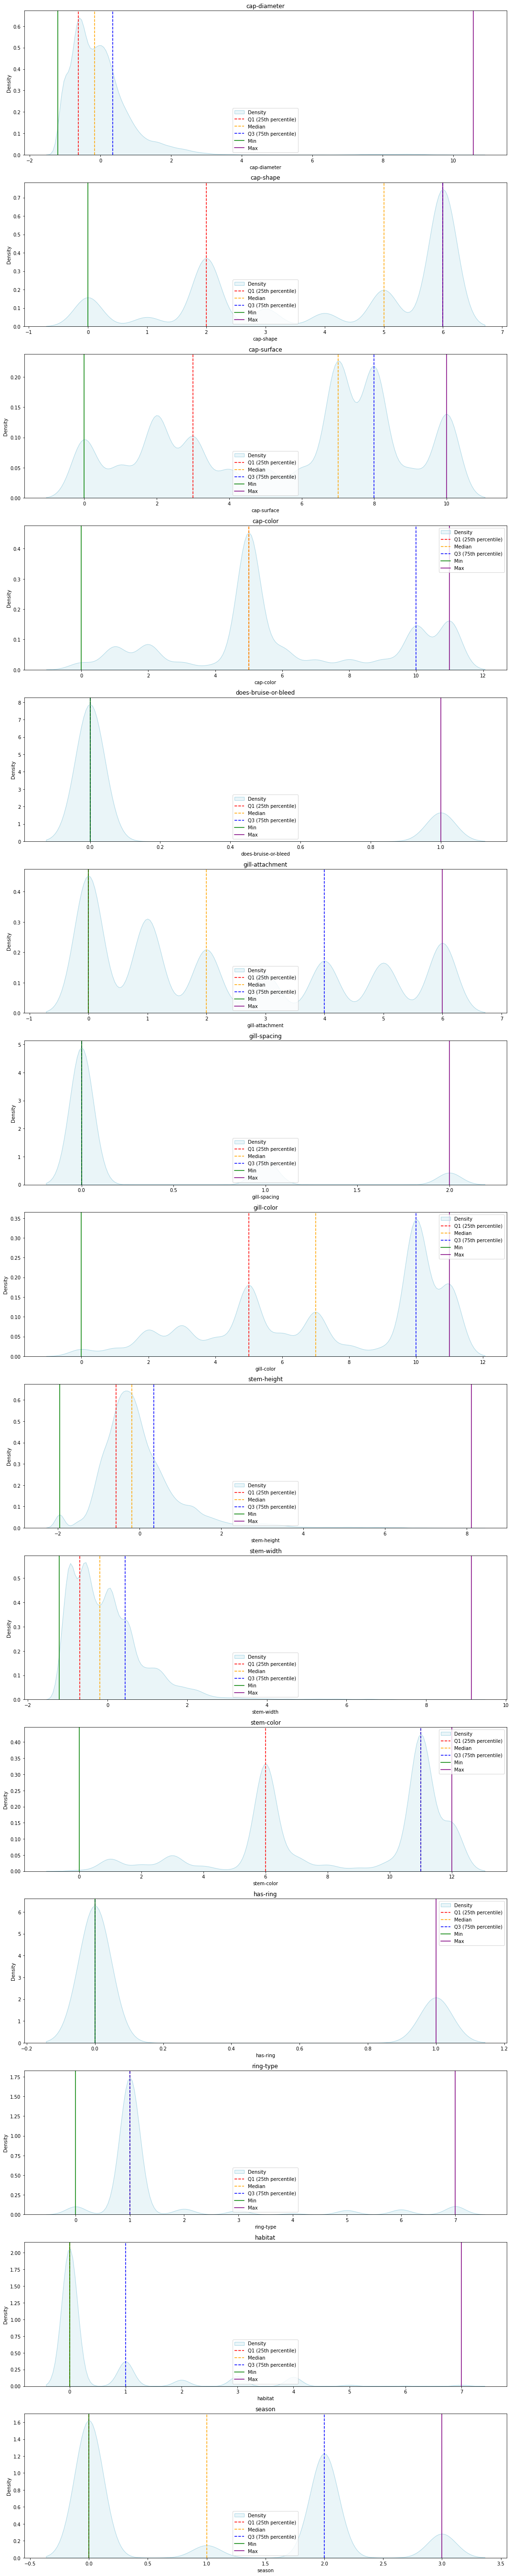

In [14]:
# Set up the figure and axis
plt.figure(figsize=(15, len(df_encoded.columns) * 5))

# Iterate over columns and plot KDE plots with annotations
for i, col in enumerate(df_encoded.columns, 1):
    plt.subplot(len(df_encoded.columns), 1, i)
    
    # KDE plot
    sns.kdeplot(df_encoded[col], fill=True, color='lightblue', label='Density')
    
    # Marking quartiles, min, max on the x-axis
    plt.axvline(df_encoded[col].quantile(0.25), color='red', linestyle='--', label='Q1 (25th percentile)')
    plt.axvline(df_encoded[col].quantile(0.50), color='orange', linestyle='--', label='Median')
    plt.axvline(df_encoded[col].quantile(0.75), color='blue', linestyle='--', label='Q3 (75th percentile)')
    plt.axvline(df_encoded[col].min(), color='green', linestyle='-', label='Min')
    plt.axvline(df_encoded[col].max(), color='purple', linestyle='-', label='Max')
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

Bowley's Coefficient

In [15]:
df_encoded['gill-spacing'].unique() #this is nan as it has onl 2 unique values

array([0, 1, 2])

In [16]:
# Calculate quartiles and median for each column
q1 = df_encoded.quantile(0.25)
q3 = df_encoded.quantile(0.75)
median = df_encoded.median()

# Compute Bowley's coefficient
bowley_skewness = (q3 + q1 - 2*median) / (q3 - q1)

# Print the results
print("Q1:\n", q1)
print("\nQ3:\n", q3)
print("\nMedian:\n", median)
print("\nBowley's coefficient:\n", bowley_skewness)

Q1:
 cap-diameter           -0.618039
cap-shape               2.000000
cap-surface             3.000000
cap-color               5.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.000000
gill-spacing            0.000000
gill-color              5.000000
stem-height            -0.576126
stem-width             -0.691461
stem-color              6.000000
has-ring                0.000000
ring-type               1.000000
habitat                 0.000000
season                  0.000000
Name: 0.25, dtype: float64

Q3:
 cap-diameter             0.343060
cap-shape                6.000000
cap-surface              8.000000
cap-color               10.000000
does-bruise-or-bleed     0.000000
gill-attachment          4.000000
gill-spacing             0.000000
gill-color              10.000000
stem-height              0.343758
stem-width               0.440479
stem-color              11.000000
has-ring                 0.000000
ring-type                1.000000
habitat                  

In [17]:
def third_moment_about_mean(series):
    """Calculate the third moment about the mean for a Pandas Series."""
    mean_value = series.mean()
    return ((series - mean_value) ** 3).mean()

# Compute third moment about the mean for each column
third_moments = df_encoded.apply(third_moment_about_mean)

# Compute standard deviations for each column
std_values = df_encoded.std()

# Compute Pearson's moment coefficient of skewness
pearson_skewness = third_moments / (std_values ** 3)

print(pearson_skewness)


cap-diameter            3.822656
cap-shape              -0.563111
cap-surface            -0.342064
cap-color               0.121101
does-bruise-or-bleed    1.725199
gill-attachment         0.421449
gill-spacing            1.948900
gill-color             -0.464586
stem-height             2.020804
stem-width              2.164850
stem-color             -0.608712
has-ring                1.163597
ring-type               2.445145
habitat                 2.335817
season                  0.282765
dtype: float64


In [18]:
def fourth_moment_about_mean(series):
    """Calculate the fourth moment about the mean for a Pandas Series."""
    mean_value = series.mean()
    return ((series - mean_value) ** 4).mean()

# Compute fourth moment about the mean for each column
fourth_moments = df_encoded.apply(fourth_moment_about_mean)

# Compute standard deviations for each column
std_values = df_encoded.std()

# Compute kurtosis (Pearson's kurtosis coefficient)
kurtosis_values = fourth_moments / (std_values ** 4)

for col, kurtosis_val in kurtosis_values.items():
    if kurtosis_val > 3:  # This is assuming excess kurtosis (i.e., kurtosis minus 3)
        print(f"{col}: {kurtosis_val}, Leptokurtic")
    elif kurtosis_val == 3:
        print(f"{col}: {kurtosis_val}, Mesokurtic")
    else:
        print(f"{col}: {kurtosis_val}, Platykurtic")


cap-diameter: 30.07416662266456, Leptokurtic
cap-shape: 1.8112085026568754, Platykurtic
cap-surface: 1.804966321332939, Platykurtic
cap-color: 2.0478365561537615, Platykurtic
does-bruise-or-bleed: 3.9763266491952747, Leptokurtic
gill-attachment: 1.7230589806796128, Platykurtic
gill-spacing: 5.597041080923157, Leptokurtic
gill-color: 1.9155743020389178, Platykurtic
stem-height: 10.681595080140703, Leptokurtic
stem-width: 11.767197244350111, Leptokurtic
stem-color: 2.211067398690862, Platykurtic
has-ring: 2.3539479514095403, Platykurtic
ring-type: 7.695332932241741, Leptokurtic
habitat: 8.328891730072316, Leptokurtic
season: 1.464068411285449, Platykurtic


In [19]:
df_encoded.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')